# Proyecto Curso

Desarrollo del proyecto Final para el Curso de Statistical Learning -  Segundo Trimestre Maestria en Ciencia de Datos- Universidad Galileo.

Este Notebook en específico servirá para el Entrenamiento/Validación de los modelos que armaremos para la predicción del problema descrito posteriormente. En un Notebook diferente se hará el Deployment del mismo modelo.

## Desarrollo del Problema

El proyecto consiste en hacer clasificación binaria  para determinar si una persona sobrevive(y=1) o no (y=0) del hundimiento del Titanic .

## Carga de Datos

El Dataset contendrá la siguiente información:
* **PassengerId:** Id de Pasajero; un correlativo para la identificación única del registro.
* **Name:** Nombre del pasajero.
* **Age:** Edad del pasajero.
* **SibSp:** En Ingles "# of siblings / spouses aboard the Titanic"; Número de hermanos/cónyuges abordo del Titanic. 
  Adicional: El Dataset define las relaciones familiares de esta manera
                   Hermano(Sibling) = hermano, hermana, hermanastro, hermanastra
                   Cónyuge (Spouses) = esposo, esposa (las amantes y los novios fueron ignorados)
* **Parch:** En Ingles "# of parents / children aboard the Titanic"; Número de padres / hijos a bordo del Titanic.
  Adicional: El Dataset define las relaciones familiares de esta manera
                   Padre (parents) = madre, padre
                   Niño (Children) = hija, hijo, hijastra, hijastro.
                   Algunos niños viajaban solo con una niñera, por lo tanto, parch = 0 para ellos.
* **Ticket:** Número de Ticket.
* **Fare:** Tarifa pagada por pasajero
* **cabin:** Número de Cabina / No todos los registros tienen esta información
* **Embarked:** Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)
* **passenger_class:** Clase del Pasajero (Upper = Alta (Primera Clase), Middle= Media (2da Clase), Lower=Baja (3era Clase).
* **passenger_sex:** Genero del Pasajero (M = (Male)Masculino, F = (Female)Femenino).
* **passenger_survived:** Si pasajero sobrevivio o no (N - NO, Y = Yes).

In [1]:
##Importamos algunas librerias que nos servirán en el desarrollo del problema
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time
import csv
import pickle

In [2]:
Full_data = pd.read_csv("data_titanic_proyecto.csv")

##Verificamos que haya cargado la información, y que tenga la forma requerida
print('Rango Tensor:',Full_data.ndim)
print('Forma Tensor:',Full_data.shape)
print('Vemos los primeros registros de la data:')
Full_data.head()

Rango Tensor: 2
Forma Tensor: (891, 12)
Vemos los primeros registros de la data:


,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
0,1,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,Lower,M,N
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,Upper,F,Y
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Lower,F,Y
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,Upper,F,Y
4,5,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,Lower,M,N


## Análisis Preliminar de los Datos

Obtenemos un listado de las variables y la distribución estadistica de las variables no categoricas.

In [3]:
##Algunos metodos importantes
Full_data.info()
Full_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         891 non-null    int64  
 1   Name                891 non-null    object 
 2   Age                 714 non-null    float64
 3   SibSp               891 non-null    int64  
 4   Parch               891 non-null    int64  
 5   Ticket              891 non-null    object 
 6   Fare                891 non-null    float64
 7   Cabin               204 non-null    object 
 8   Embarked            889 non-null    object 
 9   passenger_class     891 non-null    object 
 10  passenger_sex       891 non-null    object 
 11  passenger_survived  891 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 83.7+ KB


,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,29.699118,0.523008,0.381594,32.204208
std,257.353842,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,38.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
Full_data[['Age','SibSp','Parch','Fare']].corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


Para las columnas no númericas, vemos de forma general el contenido de los mismos.

**1. PassengerId** 

In [5]:
np.unique(Full_data['PassengerId'].values).shape

(891,)

Los valores de ID son únicos por registro.

**2. Name** 

In [6]:
np.unique(Full_data['Name'].values).shape

(891,)

Los valores de Nombre de Pasajero son únicos por pasajero, al menos no hay registros duplicados.

**3. Ticket** 

In [7]:
np.unique(Full_data['Ticket'].values).shape             

(681,)

De los 891, 681 son registros únicos del número de Ticket; 76% de los registros tienen una identificación única.

**4. Cabin**

In [8]:
Full_data['Cabin'].isna().sum()           

687

De los 891 registros, 687 no tienen información, 77% no continen información relevante para esta columna.

**5. Embarked**

In [9]:
Full_data['Embarked'].unique()   

array(['S', 'C', 'Q', nan], dtype=object)

In [10]:
Full_data['Embarked'].isna().sum()  

2

Si contiene 3 labels únicos y solo dos registros de los 891 no tienen información.

**6. Passenger Class**

In [11]:
Full_data['passenger_class'].unique()

array(['Lower', 'Upper', 'Middle'], dtype=object)

Si contiene 3 labels únicos y ningún registro sin clasificación

**7. Passenger Sex**

In [12]:
Full_data['passenger_sex'].unique()   

array(['M', 'F'], dtype=object)

Si contiene 3 labels únicos y ningún registro sin clasificación.

**8. Passenger Survived**

In [13]:
Full_data['passenger_survived'].unique()   

array(['N', 'Y'], dtype=object)

#### Datos a Utilizar

No todos los datos son representativos, se quitaran aquellos datos que son únicos por registro o que por el momento no ayudarán en nada al modelo. Entre estos estan: PassengerId, Name, Ticket, Cabin.

In [14]:
##Separamos las Variables Independientes de la variable que vamos a estimar
X = Full_data.drop(['passenger_survived','PassengerId','Name','Ticket','Cabin'], axis=1)
Y = Full_data['passenger_survived'].values

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              714 non-null    float64
 1   SibSp            891 non-null    int64  
 2   Parch            891 non-null    int64  
 3   Fare             891 non-null    float64
 4   Embarked         889 non-null    object 
 5   passenger_class  891 non-null    object 
 6   passenger_sex    891 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


In [16]:
Y.shape

(891,)

## Feature Engineering 

Se transformaran los datos para mejorar el entrenamiento del modelo, así como manejar su manipulación entre los diferentes modelos.

### Transformación variables Categoricas

Para facilitar el trabajo con los diferentes modelos, se transformaran los datos para permitir una mejor manipulación de las variables Categoricas.

1. Se transformará la variable Dependiente (Objetivo) -> passenger_survived

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()
survived_cat = Full_data['passenger_survived']
Survived_cat_encoded = encoder.fit_transform(survived_cat)
print('Revisamos como clasifico los labels {}'.format(encoder.classes_))
survived_labels= {0 : 'NO', 1: 'YES'}
print('Para posterior conversión los dejamos en un diccionario {}'.format(survived_labels))

Revisamos como clasifico los labels ['N' 'Y']
Para posterior conversión los dejamos en un diccionario {0: 'NO', 1: 'YES'}


Almacenamos esta información en la Variable Y, para su tratamiento

In [18]:
Y = Survived_cat_encoded.reshape(-1,1)

2. Se transformará la variable Dependiente (Objetivo) -> passenger_sex

In [19]:
sex_cat = Full_data['passenger_sex']
sex_cat_encoded = encoder.fit_transform(sex_cat)
print('Revisamos como clasifico los labels {}'.format(encoder.classes_))
sex_labels= {0 : 'Female', 1: 'Male'}
print('Para posterior conversión los dejamos en un diccionario {}'.format(sex_labels))

Revisamos como clasifico los labels ['F' 'M']
Para posterior conversión los dejamos en un diccionario {0: 'Female', 1: 'Male'}


Almacenamos esta información en la Variable X, ya transformado.

In [20]:
##Quitamos la columna que ya existe de passenger_sex
X=X.drop(['passenger_sex'], axis=1)
##Colocamos la nueva columna
X['passenger_sex'] =sex_cat_encoded

In [21]:
##Verificamos que no dejemos registros inconsistentes
X['passenger_sex'].unique()

array([1, 0])

3. Se transformará la variable Dependiente (Objetivo) -> Embarked

Aqui tenemos dos registros sin Dato de Embarked, lo que se hará es ver la distribución de datos de esta varible para decidir si se quita o se le asigna otro valor

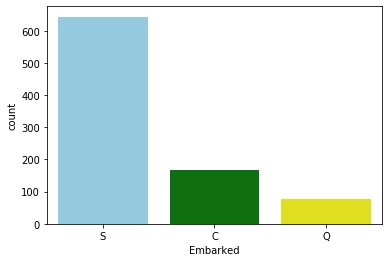

In [22]:
sns.countplot(X['Embarked'],palette=['skyblue','green','yellow'])

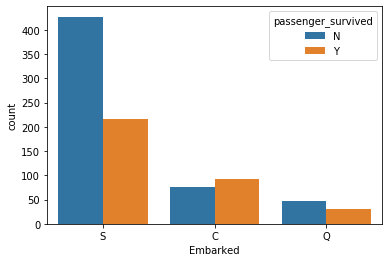

In [23]:
sns.countplot(x="Embarked", hue="passenger_survived", data=Full_data)

In [24]:
print("Cantidad de Pasajeros dividos por lugar de Embarque")
print(Full_data['Embarked'].value_counts())
print("Cantidad de Pasajeros (Que si sobrevivieron) dividos por lugar de Embarque")
print(Full_data[Full_data['passenger_survived']=='Y']['Embarked'].value_counts())
print("Cantidad de Pasajeros (Que no sobrevivieron) dividos por lugar de Embarque")
print(Full_data[Full_data['passenger_survived']=='N']['Embarked'].value_counts())

Cantidad de Pasajeros dividos por lugar de Embarque
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Cantidad de Pasajeros (Que si sobrevivieron) dividos por lugar de Embarque
S    217
C     93
Q     30
Name: Embarked, dtype: int64
Cantidad de Pasajeros (Que no sobrevivieron) dividos por lugar de Embarque
S    427
C     75
Q     47
Name: Embarked, dtype: int64


Pues no hay una distribución clara entre el Lugar de embarque y si lograron sobrevivir; y para asignar un valor de embarque a las variables que no tienen, creo que se tendria que buscar otro patron; pero dado que son dos datos, por el momento simplemente se dejará en cero (en todas las columnas resultantes del One-hot-encoding).

In [25]:
##Se identifican los registros con el valor NA en Embarked - Dado que habrá problemas en el one-hot-Encoding
X.loc[61,'Embarked']='S'
X.loc[829,'Embarked']='S'
##Verificamos como dejamos los registros nulos
X[Full_data['Embarked'].isna()]['Embarked']

61     S
829    S
Name: Embarked, dtype: object

In [26]:
Embarked_cat = X['Embarked']
Embarked_cat_encoded = encoder.fit_transform(Embarked_cat)
print('Revisamos como clasifico los labels {}'.format(encoder.classes_))
Embarked_labels= {0 : 'Cherbourg', 1: 'Queenstown', 2: 'Southampton' }
print('Para posterior conversión los dejamos en un diccionario {}'.format(Embarked_labels))

Revisamos como clasifico los labels ['C' 'Q' 'S']
Para posterior conversión los dejamos en un diccionario {0: 'Cherbourg', 1: 'Queenstown', 2: 'Southampton'}


In [27]:
from sklearn.preprocessing import OneHotEncoder

OHencoder = OneHotEncoder()
OHEmbarked_cat_encoded=OHencoder.fit_transform(Embarked_cat_encoded.reshape(-1,1)).toarray()
OHEmbarked_cat_encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [28]:
##A los registros que le pusimos valor por default de S, los volvemos cero nuevamente para no sesgar
OHEmbarked_cat_encoded[61,:]=0
OHEmbarked_cat_encoded[829,:]=0

Almacenamos esta información en la Variable X, ya transformado.

In [29]:
##Quitamos la columna que ya existe de Embarked
X=X.drop(['Embarked'], axis=1)
##Colocamos las nuevas columnas
X['Embarked_Cherbourg']=OHEmbarked_cat_encoded[:,0]
X['Embarked_Queenstown']=OHEmbarked_cat_encoded[:,1]
X['Embarked_Southampton']=OHEmbarked_cat_encoded[:,2]

4. Se transformará la variable Dependiente (Objetivo) -> passenger_class

In [30]:
##Se hará de otra forma que el anterior
from sklearn.preprocessing import LabelBinarizer
LBencoder = LabelBinarizer()
class_cat = X['passenger_class']
class_cat_encoded = LBencoder.fit_transform(class_cat)
print('Revisamos como clasifico los labels {}'.format(LBencoder.classes_))
class_labels= {0 : 'Lower', 1: 'Middle', 3: 'Upper' }
print('Para posterior conversión los dejamos en un diccionario {}'.format(class_labels))

Revisamos como clasifico los labels ['Lower' 'Middle' 'Upper']
Para posterior conversión los dejamos en un diccionario {0: 'Lower', 1: 'Middle', 3: 'Upper'}


Almacenamos esta información en la Variable X, ya transformado.

In [31]:
##Quitamos la columna que ya existe de Embarked
X=X.drop(['passenger_class'], axis=1)
##Colocamos las nuevas columnas
X['passenger_class_Lower']=class_cat_encoded[:,0]
X['passenger_class_Middle']=class_cat_encoded[:,1]
X['passenger_class_Upper']=class_cat_encoded[:,2]

Despues de todas las transformaciones de las variables Categoricas, así quedo el DataFrame

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     714 non-null    float64
 1   SibSp                   891 non-null    int64  
 2   Parch                   891 non-null    int64  
 3   Fare                    891 non-null    float64
 4   passenger_sex           891 non-null    int32  
 5   Embarked_Cherbourg      891 non-null    float64
 6   Embarked_Queenstown     891 non-null    float64
 7   Embarked_Southampton    891 non-null    float64
 8   passenger_class_Lower   891 non-null    int32  
 9   passenger_class_Middle  891 non-null    int32  
 10  passenger_class_Upper   891 non-null    int32  
dtypes: float64(5), int32(4), int64(2)
memory usage: 62.8 KB


In [33]:
X.describe()

,Age,SibSp,Parch,Fare,passenger_sex,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,passenger_class_Lower,passenger_class_Middle,passenger_class_Upper
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783,0.551066,0.206510,0.242424
std,14.526497,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876,0.497665,0.405028,0.428790
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Completar Datos Faltantes

Viendo las estadisticas nuevamente, vemos que hay registros de *edad* que no estan completos.

De 891 registros, 714 si tienen registro de edad, entonces hay 177 registros sin edad (casi el 20%). Aquí el tema es que hacer con esos registros sin edad; o completamos con algún valor por defecto, en en base calculamos este valor, o quitamos simplemente los registros.

In [34]:
Full_data[Full_data['Age'].isna()]

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,passenger_class,passenger_sex,passenger_survived
5,6,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,Lower,M,N
17,18,"Williams, Mr. Charles Eugene",NaN,0,0,244373,13.0000,NaN,S,Middle,M,Y
19,20,"Masselmani, Mrs. Fatima",NaN,0,0,2649,7.2250,NaN,C,Lower,F,Y
26,27,"Emir, Mr. Farred Chehab",NaN,0,0,2631,7.2250,NaN,C,Lower,M,N
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",NaN,0,0,330959,7.8792,NaN,Q,Lower,F,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,"Razi, Mr. Raihed",NaN,0,0,2629,7.2292,NaN,C,Lower,M,N
863,864,"Sage, Miss. Dorothy Edith ""Dolly""",NaN,8,2,CA. 2343,69.5500,NaN,S,Lower,F,N
868,869,"van Melkebeke, Mr. Philemon",NaN,0,0,345777,9.5000,NaN,S,Lower,M,N
878,879,"Laleff, Mr. Kristo",NaN,0,0,349217,7.8958,NaN,S,Lower,M,N


Vemos los promedios de edad por clase

In [35]:
print('Promedio de Edad para Clase baja {}'.format(Full_data[Full_data['passenger_class']=='Lower']['Age'].mean()))
print('Promedio de Edad para Clase Media {}'.format(Full_data[Full_data['passenger_class']=='Middle']['Age'].mean()))
print('Promedio de Edad para Clase Alta {}'.format(Full_data[Full_data['passenger_class']=='Upper']['Age'].mean()))
print('Promedio de Edad General {}'.format(Full_data['Age'].mean()))

Promedio de Edad para Clase baja 25.14061971830986
Promedio de Edad para Clase Media 29.87763005780347
Promedio de Edad para Clase Alta 38.233440860215055
Promedio de Edad General 29.69911764705882


Vemos los promedios de edad por Sexo (Genero)

In [36]:
print('Promedio de Edad para Hombres {}'.format(Full_data[Full_data['passenger_sex']=='M']['Age'].mean()))
print('Promedio de Edad para Mujeres {}'.format(Full_data[Full_data['passenger_sex']=='F']['Age'].mean()))
print('Promedio de Edad General {}'.format(Full_data['Age'].mean()))

Promedio de Edad para Hombres 30.72664459161148
Promedio de Edad para Mujeres 27.915708812260537
Promedio de Edad General 29.69911764705882


Vemos los promedios de edad por Zona de Embarque

In [37]:
print('Promedio de Edad Embarkados en Southampton {}'.format(Full_data[Full_data['Embarked']=='S']['Age'].mean()))
print('Promedio de Edad Embarkados en Cherbourg {}'.format(Full_data[Full_data['Embarked']=='C']['Age'].mean()))
print('Promedio de Edad Embarkados en Queenstown {}'.format(Full_data[Full_data['Embarked']=='Q']['Age'].mean()))
print('Promedio de Edad General {}'.format(Full_data['Age'].mean()))

Promedio de Edad Embarkados en Southampton 29.44539711191336
Promedio de Edad Embarkados en Cherbourg 30.81476923076923
Promedio de Edad Embarkados en Queenstown 28.089285714285715
Promedio de Edad General 29.69911764705882


Creo que lo mejor colocar un valor por defecto de acuerdo a la clase que pertenece el pasajero.

In [38]:
#Veamos la distribución de los datos nulos de Edad por Clase
Full_data[Full_data['Age'].isna()]['passenger_class'].value_counts()

Lower     136
Upper      30
Middle     11
Name: passenger_class, dtype: int64

In [39]:
median_lower = Full_data[Full_data['passenger_class']=='Lower']['Age'].mean()
XTemp = X.loc[Full_data['passenger_class']=='Lower']
XIndex = XTemp.loc[XTemp['Age'].isna()].index
X.loc[XIndex,'Age']= median_lower

In [40]:
median_Middle = Full_data[Full_data['passenger_class']=='Middle']['Age'].mean()
XTemp = X.loc[Full_data['passenger_class']=='Middle']
XIndex = XTemp.loc[XTemp['Age'].isna()].index
X.loc[XIndex,'Age']= median_Middle

In [41]:
median_Upper = Full_data[Full_data['passenger_class']=='Upper']['Age'].mean()
XTemp = X.loc[Full_data['passenger_class']=='Upper']
XIndex = XTemp.loc[XTemp['Age'].isna()].index
X.loc[XIndex,'Age']= median_Upper

In [42]:
##Revisamos que no queden valores Nulos
X.loc[X['Age'].isna()]

,Age,SibSp,Parch,Fare,passenger_sex,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,passenger_class_Lower,passenger_class_Middle,passenger_class_Upper


### Normalización de Datos

Usamos scikitLearn para Normalizar todos los datos.

In [278]:
from sklearn.preprocessing import StandardScaler

#Se setea el scaler
scaler = StandardScaler()
scaler.fit(X)

#Se transforma los datos
X_Norm=scaler.transform(X)
X_Norm.shape

(891, 11)

***Nota:*** *Se escoge normalización normal, ya que para el modelo SVM se recomienda usar esta estandarización para mejores resultados, y dado que no afecta los demás modelos, se escoge este.*

from sklearn.preprocessing import MinMaxScaler

#Se setea el scaler
scaler = MinMaxScaler()
scaler.fit(X)

#Se transforma los datos
X_Norm=scaler.transform(X)
X_Norm.shape

***Nota:*** *Se deja codigo como referencia, dado que este empece a usar en la creación de los modelos; pero por lo indicado anteriormente se usará normalización standard.*

Algunas estadisticas para los datos transformados

In [44]:
pd.DataFrame(X_Norm).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,9.968332e-17,4.386066e-17,5.382900e-17,3.987333e-18,-1.156327e-16,-1.993666e-17,0.000000,-4.984166e-17,-6.778466e-17,1.993666e-17,-7.575933e-17
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-2.186823e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-1.355574e+00,-4.820427e-01,-0.307562,-1.614710e+00,-1.107926e+00,-5.101515e-01,-5.656854e-01
25%,-5.523603e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-1.355574e+00,-4.820427e-01,-0.307562,-1.614710e+00,-1.107926e+00,-5.101515e-01,-5.656854e-01
50%,-2.494014e-01,-4.745452e-01,-4.736736e-01,-3.573909e-01,7.376951e-01,-4.820427e-01,-0.307562,6.193064e-01,9.025874e-01,-5.101515e-01,-5.656854e-01
75%,5.837355e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,7.376951e-01,-4.820427e-01,-0.307562,6.193064e-01,9.025874e-01,-5.101515e-01,-5.656854e-01
max,3.840543e+00,6.784163e+00,6.974147e+00,9.667167e+00,7.376951e-01,2.074505e+00,3.251373,6.193064e-01,9.025874e-01,1.960202e+00,1.767767e+00


## Análisis - Relaciones entre los Datos

Ya transformados los datos, valdria la pena revisar las relaciones que tenemos entre los distintos datos, desde la correlación de los mismos como la densidad de cada uno.

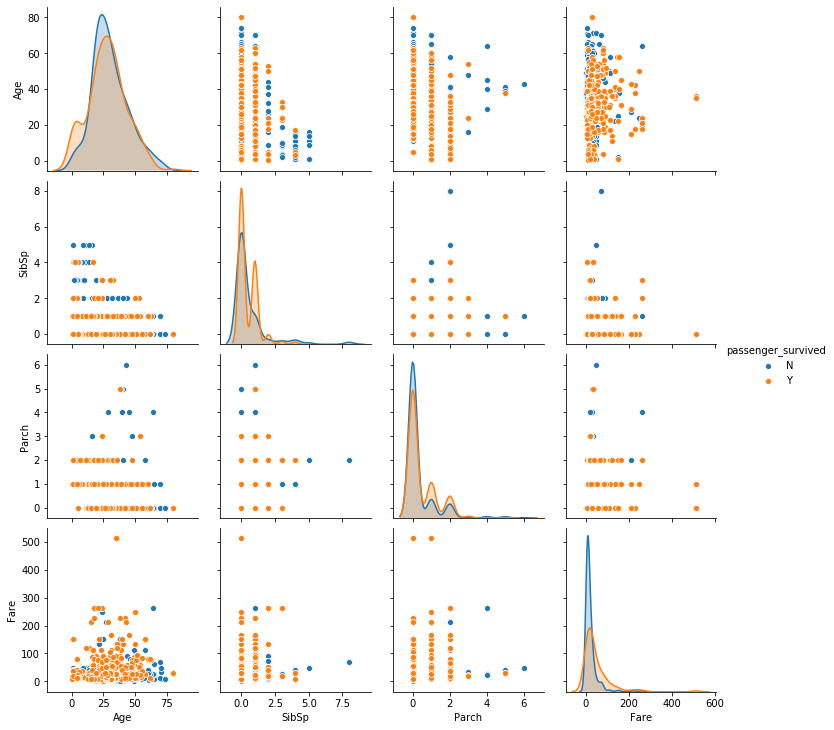

In [45]:
sns.pairplot(Full_data[['Age','SibSp','Parch','Fare','passenger_survived']],hue='passenger_survived')

**Observación:** Parece ser que el factor de edad no determina su capacidad de supervivencia, y combinando con otros factores parece funcionar mejor (excepto factor Fare)

1. Analisis de variables categoricas. ¿El Genero de la persona podría determinar su supervivencia?

In [46]:
totalwomen= Full_data[Full_data.passenger_sex == 'F']['passenger_sex'].value_counts()[0]
womenSurvived= Full_data[Full_data.passenger_sex == 'F']['passenger_survived'].value_counts()[0]

rate_women = womenSurvived/totalwomen

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


**Observación:** Parece que ser mujer garantiza un buen porcentaje de supervivencia.

In [47]:
totalmen= Full_data[Full_data.passenger_sex == 'M']['passenger_sex'].value_counts()[0]
menSurvived= Full_data[Full_data.passenger_sex == 'M']['passenger_survived'].value_counts()[1]

rate_men = menSurvived/totalmen

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


**Observación:** Parece que ser al ser hombre se tienen menos posibilidad de supervivencia.

2. ¿La clase en la que se encuentra influye tambien en la sobrevivencia?

In [48]:
TotalUpper = Full_data[Full_data.passenger_class == 'Upper']['passenger_class'].value_counts()[0]
upperSurvided=Full_data[Full_data.passenger_class == 'Upper']['passenger_survived'].value_counts()[0]
rate_upperSurvived= upperSurvided/TotalUpper

In [49]:
TotalMiddle = Full_data[Full_data.passenger_class == 'Middle']['passenger_class'].value_counts()[0]
MiddleSurvided=Full_data[Full_data.passenger_class == 'Middle']['passenger_survived'].value_counts()[1]
rate_MiddleSurvived= MiddleSurvided/TotalMiddle

In [50]:
TotalLower = Full_data[Full_data.passenger_class == 'Lower']['passenger_class'].value_counts()[0]
LowerSurvived=Full_data[Full_data.passenger_class == 'Lower']['passenger_survived'].value_counts()[1]
rate_LowerSurvived= LowerSurvived/TotalLower

In [51]:
print("% of Upper class who survived:", rate_upperSurvived)
print("% of Middle class who survived:", rate_MiddleSurvived)
print("% of Lower class who survived:", rate_LowerSurvived)

% of Upper class who survived: 0.6296296296296297
% of Middle class who survived: 0.47282608695652173
% of Lower class who survived: 0.24236252545824846


**Observación:** Entre mayor la clase, mayor la posibilidad de supervivencia

3. ¿El Puerto de Embarque influye tambien en la sobrevivencia?

In [52]:
Full_data[Full_data.Embarked == 'Q']['passenger_survived'].value_counts()

N    47
Y    30
Name: passenger_survived, dtype: int64

In [53]:
TotalEmbarkedS = Full_data[Full_data.Embarked == 'S']['Embarked'].value_counts()[0]
EmbarkedSSurvided=Full_data[Full_data.Embarked == 'S']['passenger_survived'].value_counts()[1]
rate_EmbarkedSSurvived= EmbarkedSSurvided/TotalEmbarkedS

In [54]:
TotalEmbarkedC = Full_data[Full_data.Embarked == 'C']['Embarked'].value_counts()[0]
EmbarkedCSurvided=Full_data[Full_data.Embarked == 'C']['passenger_survived'].value_counts()[0]
rate_EmbarkedCSurvived= EmbarkedCSurvided/TotalEmbarkedC

In [55]:
TotalEmbarkedQ = Full_data[Full_data.Embarked == 'Q']['Embarked'].value_counts()[0]
EmbarkedQSurvided=Full_data[Full_data.Embarked == 'Q']['passenger_survived'].value_counts()[1]
rate_EmbarkedQSurvived= EmbarkedQSurvided/TotalEmbarkedQ

In [56]:
print("% of Embarked Southampton who survived:", rate_EmbarkedSSurvived)
print("% of Embarked Cherbourg who survived:", rate_EmbarkedCSurvived)
print("% of Embarked Queenstown who survived:", rate_EmbarkedQSurvived)

% of Embarked Southampton who survived: 0.33695652173913043
% of Embarked Cherbourg who survived: 0.5535714285714286
% of Embarked Queenstown who survived: 0.38961038961038963


**Observación:** No hay una relación muy clara entre el puerto que embarco y el nivel de supervivencia.

## Separara Datos de Entrenamiento/Validación/Pruebas

Usaremos scikitLearn para hacer la separación de los dataset.
* Entrenamiento (Train) (80%)
* Validación (Cross Validation) (10%)
* Pruebas (Test)(20%) 

In [279]:
from sklearn.model_selection import train_test_split

##Hacemos la separación de los data sets
X_Ttrain, X_test, y_Ttrain, y_test = train_test_split(X_Norm,Y,test_size=0.1,random_state=21, stratify=Y)
##Volvemos a dividir el de Train para tener otro para Cross-validation
X_train, X_Validation, y_train, y_Validation = train_test_split(X_Ttrain,y_Ttrain,test_size=0.11,random_state=21, stratify=y_Ttrain)

In [58]:
print("El Data set de Entrenamiento quedo de este tamaño X: {} Y:{}".format(X_train.shape, y_train.shape ))
print("El Data set de Validación quedo de este tamaño X: {} Y:{}".format(X_Validation.shape, y_Validation.shape ))
print("El Data set de Pruebas quedo de este tamaño X: {} Y:{}".format(X_test.shape, y_test.shape ))

El Data set de Entrenamiento quedo de este tamaño X: (712, 11) Y:(712, 1)
El Data set de Validación quedo de este tamaño X: (89, 11) Y:(89, 1)
El Data set de Pruebas quedo de este tamaño X: (90, 11) Y:(90, 1)


## Creación de Módelos

### Módelo - Árbol de Decisión

Se hará un modelo usando el Algoritmo de DecisionTree; por simplificación se usará scikit Learn con las funciones que este implementa.

#### Definición de Modelo y Función de Entrenamiento

Definimos el modelo y lo dejamos en la función de entrenamiento para que sea reutilizable.

In [324]:
from sklearn import tree

def EntrenamientoDT(max_depth,x,y,x_val,y_val):
    
    ##Creamos el Modelo
    Tree_classifier = tree.DecisionTreeClassifier(max_depth = max_depth, random_state=0)
    ##Ajustamos el Modelo con los datos de Entrenamiento
    Tree_classifier = Tree_classifier.fit(X_train,y_train )
    
    ##Dejamos registro de Bitacora del Entrenamiento
    string_conf= time.strftime("%Y%m%d") + "_"+time.strftime("%H%M%S")+"_DecisionTree_max_depth="+str(max_depth)
    print(string_conf)
    
    #En Base al Modelo se hará la predicción con el Dataset de Entrenamiento y Validación
    ##Haremos la predicción para los datos de validación
    y_pred_train = Tree_classifier.predict(X_train)
    y_pred_Val=Tree_classifier.predict(X_Validation)
    
    #Acurracy
    accuracy_train= accuracy_score(y_train, y_pred_train)
    accuracy_val= accuracy_score(y_Validation, y_pred_Val)
    
    #Error
    error_train= 1-accuracy_train
    error_val= 1 -accuracy_val 
    
    #Precision
    precision_train=precision_score(y_train, y_pred_train, average='binary')
    precision_val=precision_score(y_Validation, y_pred_Val, average='binary')
    
    #Recall
    recall_train=recall_score(y_train, y_pred_train, average='binary')
    recall_val=recall_score(y_Validation,  y_pred_Val, average='binary')
    
    #F1
    f1_train=f1_score(y_train, y_pred_train, average='binary')
    f1_val=f1_score(y_Validation, y_pred_Val, average='binary')
    
    
    ##Determinamos la Metrica para los datos de Entrenamiento
    print("Prueba Datos Entrenamiento - Accuracy:{:.4f} Error:{:.4f} Precision:{:.4f} Recall:{:.4f} f1:{:.4f}".format(accuracy_train,error_train,
                                                                                        precision_train,recall_train,
                                                                                        f1_train))
    
    ##Determinamos la Metrica para los datos de Validación
    print("Prueba Datos Validación - Accuracy:{:.4f} Error:{:.4f} Precision:{:.4f} Recall:{:.4f} f1:{:.4f}".format(accuracy_val,error_val,
                                                                                        precision_val,recall_val,
                                                                                        f1_val))
    
    ##Guardamos un log de la prueba - Un archivo CSV
    myData = {'id':string_conf, 'max_depth':max_depth,'accuracy_train':accuracy_train,'accuracy_val':accuracy_val,'error_train':error_train,'error_val':error_val,
              'precision_train':precision_train,'precision_val':precision_val,'recall_train':recall_train,'recall_val':recall_val,'f1_train':f1_train,'f1_val':f1_val}

    myFile="logfile - DecisionTree - Training.csv" 
    # add row to CSV file
    header=['id','max_depth','accuracy_train', 'accuracy_val', 'error_train', 'error_val', 'precision_train', 'precision_val', 'recall_train', 'recall_val', 'f1_train', 'f1_val']
    with open(myFile, "a", newline='') as f:
        writer = csv.DictWriter(f, fieldnames=header)
        writer.writerow(myData)
        
    #Almacenmos el Clasificador (Nuestra clase creada) como un Dump con Pickle
    pickle.dump( Tree_classifier, open( "DumpDT/"+string_conf+".p", "wb" ) )
    
    ##Retornamos el Objeto con los metodos para predicciones
    return Tree_classifier

#### Entrenamos Nuestra Función de Entrenamiento

En el inciso anterior definimos el Modelo y la función de Entrenamiento, ahorita procedemos a entrar nuestro modelo variando el parametro.

In [336]:
##Seteamos los datos que enviaremos a la función de Entrenamiento
max_depth=7

DT_Classifier= EntrenamientoDT(max_depth,X_train,y_train,X_Validation,y_Validation)

20200629_210228_DecisionTree_max_depth=7
Prueba Datos Entrenamiento - Accuracy:0.8736 Error:0.1264 Precision:0.8797 Recall:0.7766 f1:0.8249
Prueba Datos Validación - Accuracy:0.8989 Error:0.1011 Precision:0.8788 Recall:0.8529 f1:0.8657


**NOTA:** *Para simplificación, se deja en el inciso anterior solamente el modelo con el que se obtuvo los mejores resultados; posteriormente mostraremos el log de las pruebas para mostrar los diferentes experimentes.*

#### Grafo de Arbol

Vemos como quedo a nivel gráfico el arbol que entrenamos con nuestro modelo

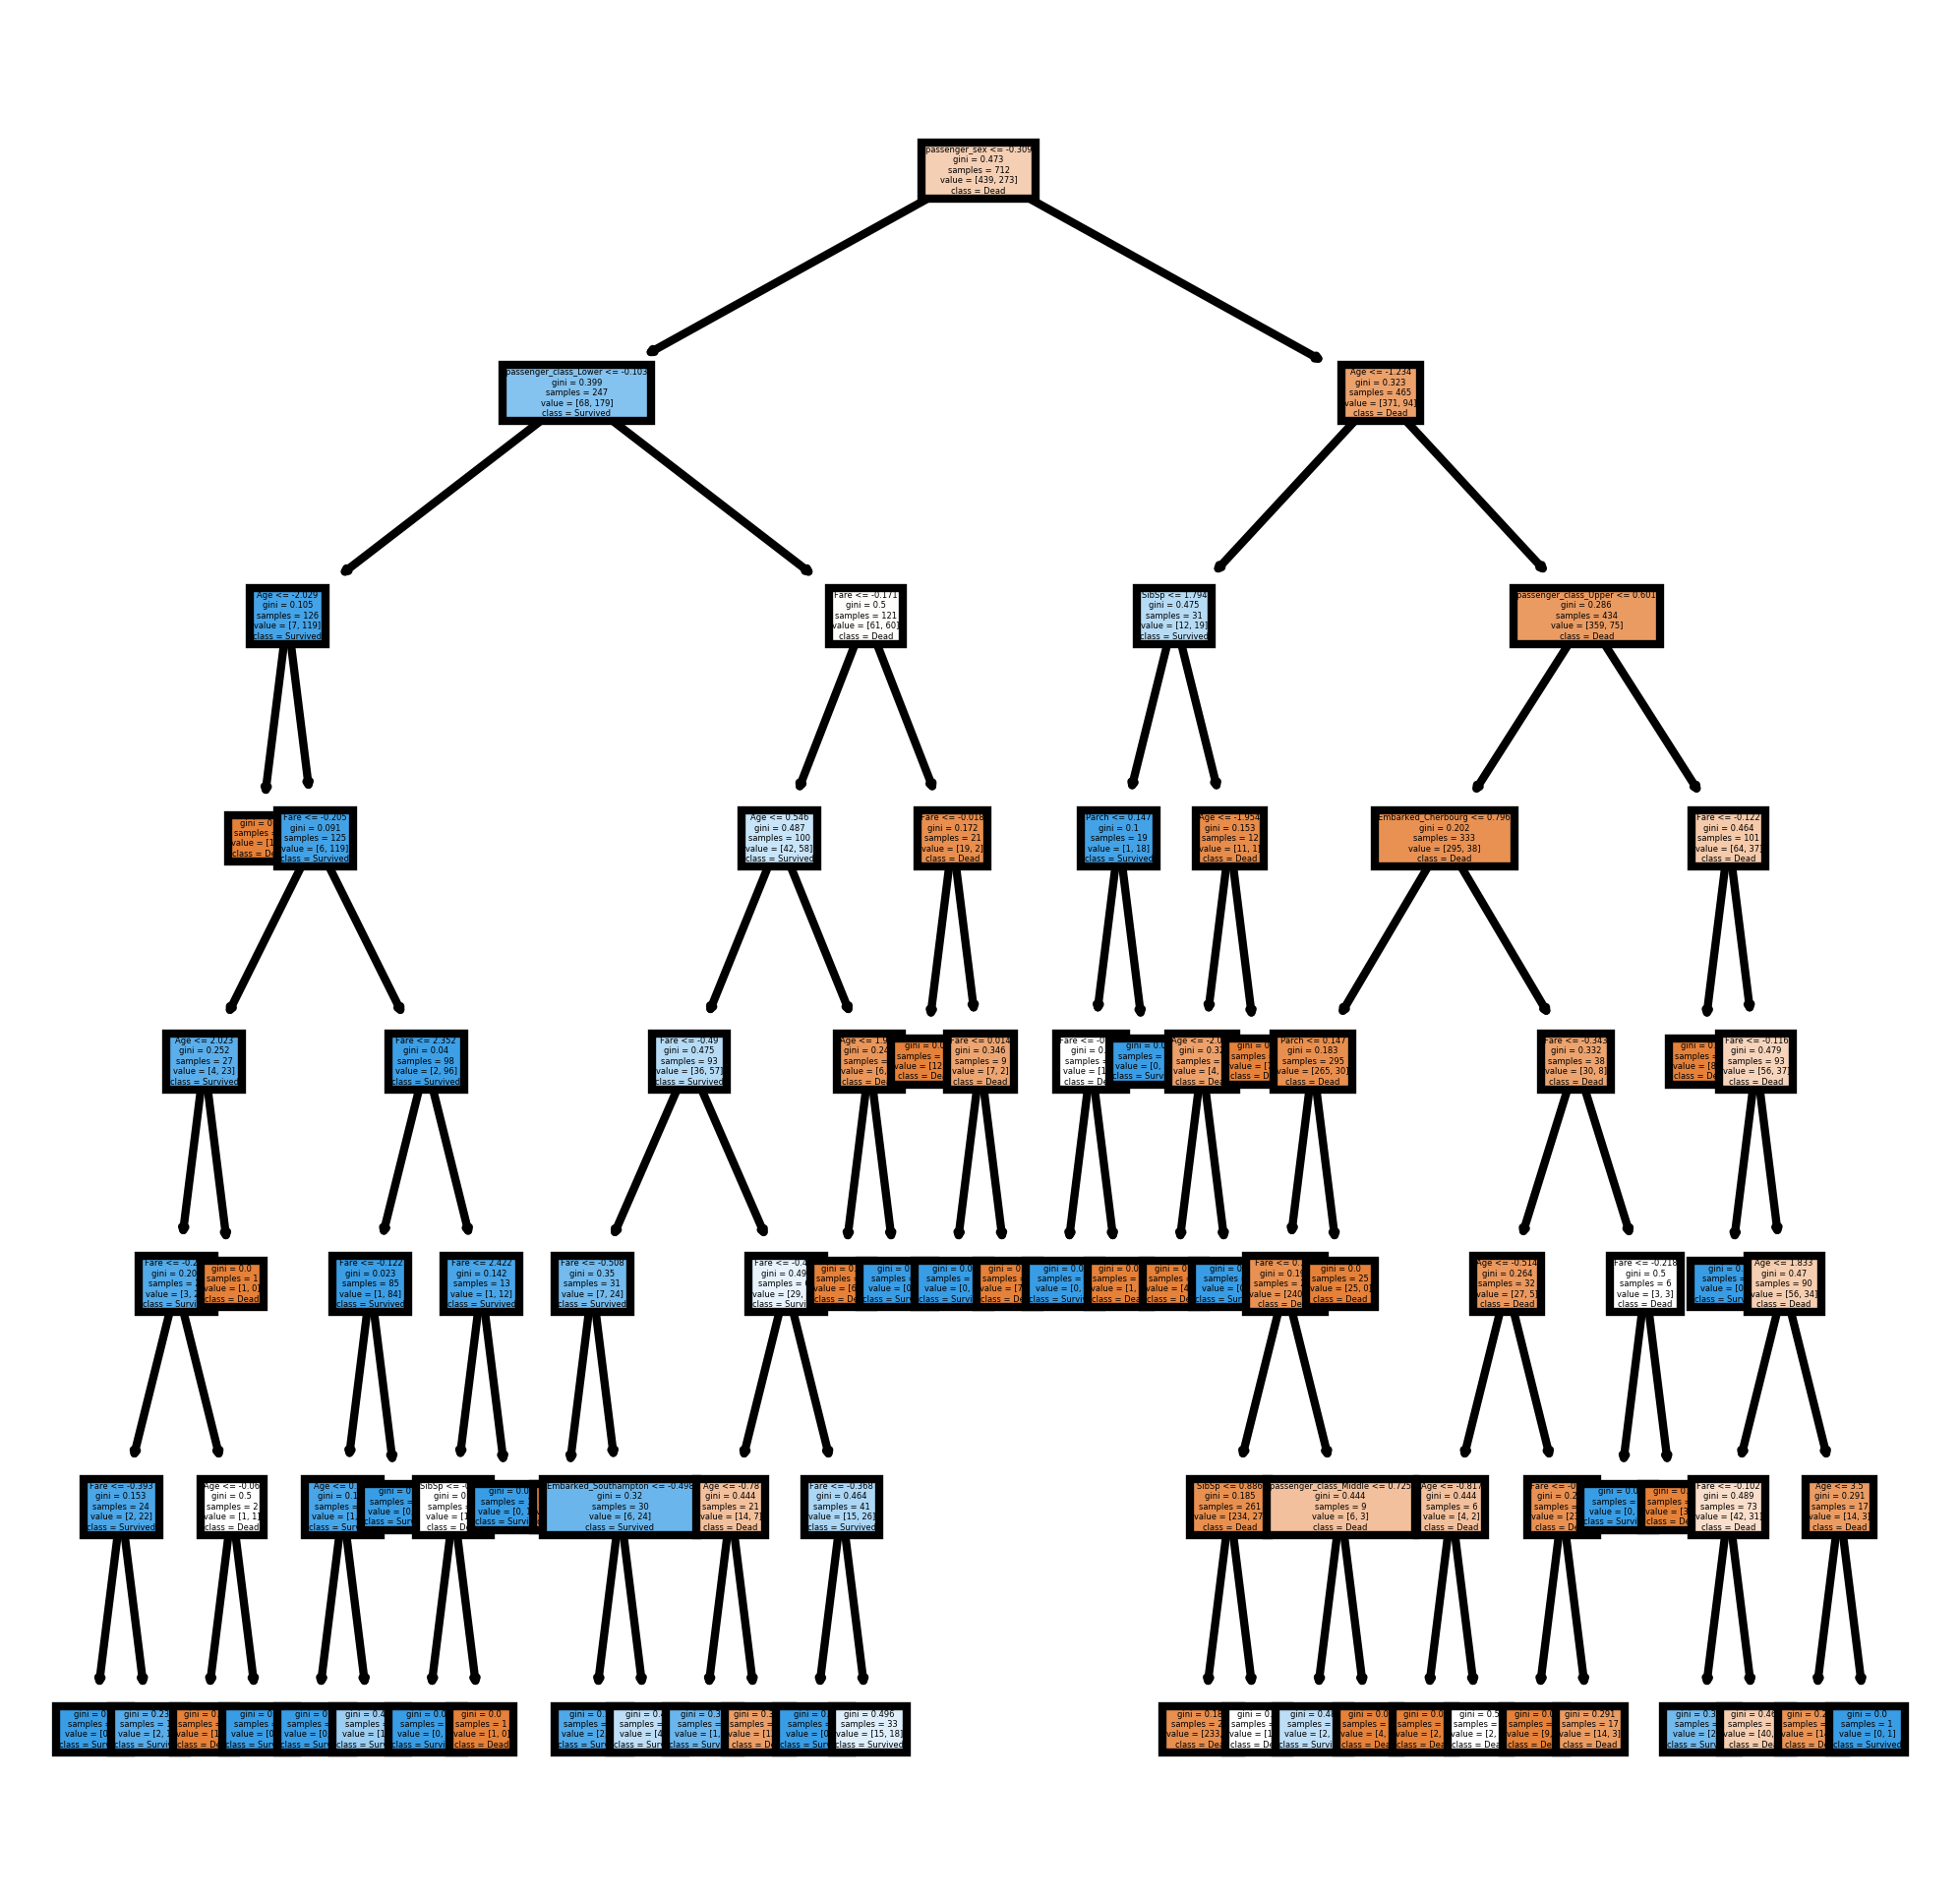

In [338]:
feature_names = np.array(X.columns)
target_names = np.array(['Dead', 'Survived'])
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=600)
tree.plot_tree(DT_Classifier,feature_names = feature_names,class_names= target_names,filled=True )
fig.savefig('assets/DecisionTree.png')

#### Log de Entrenamientos
El log se guardo en un archivo csv llamado **"logfile - DecisionTree - Training.csv"**; se coloca imagen para referencia.

<img src="assets/LogCsvDT.png">

#### Archivos para Deployment

Para el deployment, se exportará el objeto ya instanciado con el clasificador DecisionTree; este nos ayudará para la predicción fuera de este archivo.

Se dejarán estos datos en la carpeta **"./DumpDT"**. Se coloca imagen de la carpeta como referencia.

<img src="assets/DumpsDT.png">

### Módelo - Support Vector Machine

Se hará un modelo usando el Algoritmo de Support Vector Machine; por simplificación se usará scikit Learn con las funciones que este implementa.

#### Definición de Modelo y Función de Entrenamiento

Definimos el modelo y lo dejamos en la función de entrenamiento para que sea reutilizable.

In [320]:
from sklearn import svm

def EntrenamientoSVM(typeSVM,x,y,x_val,y_val,random_state=None,tol=0.001,regularization_parameter=1,degree=3,max_iter=-1):
    
    ##Podremos elegir entre los tres modelos que implementa en SVM en ScikitLearn
    ##1 - SVC  2 - NuSVC   3 - LinearSVC
    if typeSVM == 1:
        svm_clf = svm.SVC(random_state=random_state,tol=tol,C=regularization_parameter,degree=degree,max_iter=max_iter)
    elif typeSVM == 2:
        svm_clf = svm.NuSVC(random_state=random_state,tol=tol,degree=degree,max_iter=max_iter)
    else:
         svm_clf = svm.LinearSVC(random_state=random_state,tol=tol,C=regularization_parameter,max_iter=max_iter)
    ##Ajsutamos el Modelo con los datos de Entrenamiento
    svm_clf.fit(X_train, np.array(y_train).ravel())
    
    ##Dejamos registro de Bitacora del Entrenamiento
    string_conf= time.strftime("%Y%m%d") + "_"+time.strftime("%H%M%S")+"_SVM_random_state="+str(random_state)+"_tol="+str(tol)+"_C="+str(regularization_parameter)+"_degree="+str(degree)+"_max_iter="+str(max_iter)
    print(string_conf)
    
    #En Base al Modelo se hará la predicción con el Dataset de Entrenamiento y Validación
    ##Haremos la predicción para los datos de validación
    y_pred_train = svm_clf.predict(X_train)
    y_pred_Val=svm_clf.predict(X_Validation)
    
    #Acurracy
    accuracy_train= accuracy_score(y_train, y_pred_train)
    accuracy_val= accuracy_score(y_Validation, y_pred_Val)
    
    #Error
    error_train= 1-accuracy_train
    error_val= 1 -accuracy_val 
    
    #Precision
    precision_train=precision_score(y_train, y_pred_train, average='binary')
    precision_val=precision_score(y_Validation, y_pred_Val, average='binary')
    
    #Recall
    recall_train=recall_score(y_train, y_pred_train, average='binary')
    recall_val=recall_score(y_Validation,  y_pred_Val, average='binary')
    
    #F1
    f1_train=f1_score(y_train, y_pred_train, average='binary')
    f1_val=f1_score(y_Validation, y_pred_Val, average='binary')
    
    
    ##Determinamos la Metrica para los datos de Entrenamiento
    print("Prueba Datos Entrenamiento - Accuracy:{:.4f} Error:{:.4f} Precision:{:.4f} Recall:{:.4f} f1:{:.4f}".format(accuracy_train,error_train,
                                                                                        precision_train,recall_train,
                                                                                        f1_train))
    
    ##Determinamos la Metrica para los datos de Validación
    print("Prueba Datos Validación - Accuracy:{:.4f} Error:{:.4f} Precision:{:.4f} Recall:{:.4f} f1:{:.4f}".format(accuracy_val,error_val,
                                                                                        precision_val,recall_val,
                                                                                        f1_val))
    
    ##Guardamos un log de la prueba - Un archivo CSV
    myData = {'id':string_conf, 'random_state':random_state,'tol':tol,'C':regularization_parameter,'degree':degree,'max_iter':max_iter,'accuracy_train':accuracy_train,'accuracy_val':accuracy_val,'error_train':error_train,'error_val':error_val,
              'precision_train':precision_train,'precision_val':precision_val,'recall_train':recall_train,'recall_val':recall_val,'f1_train':f1_train,'f1_val':f1_val}

    myFile="logfile - SVM - Training.csv" 
    # add row to CSV file
    header=['id','random_state','tol','C','degree','max_iter','accuracy_train', 'accuracy_val', 'error_train', 'error_val', 'precision_train', 'precision_val', 'recall_train', 'recall_val', 'f1_train', 'f1_val']
    with open(myFile, "a", newline='') as f:
        writer = csv.DictWriter(f, fieldnames=header)
        writer.writerow(myData)
        
    #Almacenmos el Clasificador (Nuestra clase creada) como un Dump con Pickle
    pickle.dump( svm_clf, open( "DumpSVM/"+string_conf+".p", "wb" ) )
    
    ##Retornamos el Objeto con los metodos para predicciones
    return svm_clf

#### Entrenamos Nuestra Función de Entrenamiento

En el inciso anterior definimos el Modelo y la función de Entrenamiento, ahorita procedemos a entrar nuestro modelo variando los parametros.

In [322]:
##Seteamos los datos que enviaremos a la función de Entrenamiento
random_state=None
tol=0.001 #Nivel de Tolerancia
regularization_parameter = 1 #Regularization parameter
degree=3 
max_iter=-1 #-1 es que no tiene limite
typeSVM = 1 #1 - SVC  2 - NuSVC   3 - LinearSVC

SVM_Classifier= EntrenamientoSVM(typeSVM,X_train,y_train,X_Validation,y_Validation,random_state,tol,regularization_parameter,degree,max_iter)

20200629_205535_SVM_random_state=None_tol=0.001_C=1_degree=3_max_iter=-1
Prueba Datos Entrenamiento - Accuracy:0.8301 Error:0.1699 Precision:0.8918 Recall:0.6337 f1:0.7409
Prueba Datos Validación - Accuracy:0.8876 Error:0.1124 Precision:0.9286 Recall:0.7647 f1:0.8387


**NOTA:** *Para simplificación, se deja en el inciso anterior solamente el modelo con el que se obtuvo los mejores resultados; posteriormente mostraremos el log de las pruebas para mostrar los diferentes experimentos.*

#### Log de Entrenamientos

El log se guardo en un archivo csv llamado **"logfile - SVM - Training.csv"**; se coloca imagen para referencia.

<img src="assets/LogCsvSVM.png">

#### Archivos para Deployment
Para el deployment, se exportará el objeto ya instanciado con el clasificador Support Vector Machine; este nos ayudará para la predicción fuera de este archivo.

Se dejarán estos datos en la carpeta **"./DumpSVM"**. Se coloca imagen de la carpeta como referencia.

<img src="assets/DumpsSVM.png">

### Módelo - Naive Bayes

Se hará un modelo usando el Algoritmo de Naive Bayes; este modelo usa el Teorema de Bayes y se basa en tablas de frecuencia y probibilidad.

Aquí no usaremos scikit Learn (ya que si incluye este modelo) y se hará de forma manual la implementación.

#### Definición de Modelo

Se hará una clase que defina el Clasificador Naive Bayes.

In [91]:
##Se hará en una clase para implementar los metodos de Fit y Predict que usamos en Scikit Learn
class NaiveBayes(object):
    """ Clasificador Binario Naive Bayes para datos Categoricos"""
    
    ##Constructor de la Clase
    def __init__(self, alpha=1.0):
        """ Constructor del Clasificador Naive Bayes """
        ##Probabilidad a Priori para Cada Categoria
        self.prior = None
        ##Varible que nos servirá para los conteos por clase  (Categoria)
        self.class_counts = None
        ##Probabilidad condicional por Clase (Categoria)
        self.lk_class = None
        ##Valor de Alfa para suavisado de los datos, por defecto se deja en 1
        self.alpha = alpha
        ##Es una convención de aprendizaje de scikit para garantizar que no intentemos accidentalmente hacer predicciones 
        ##sobre un modelo que aún no se ha ajustado - Esto es opcional
        self.is_fitted_ = False
        
    def fit(self, X: np.ndarray, y: np.ndarray):
        """ Ajustar los datos de entrenamiento para el clasificador Naive Bayes"""

        #Número de Elemento en el arreglo
        n = X.shape[0]
        
        #Determinar la probabilidad a Priori de cada categoria
        X_by_class = np.array([X[tuple([y[:,0] == c])] for c in np.unique(y)])
        self.prior = np.array([len(X_class) / n for X_class in X_by_class])
        
        ##Determinamos la probabilidad condicional por cada categoria
        self.class_counts = np.array([sub_arr.sum(axis=0) for sub_arr in X_by_class]) + self.alpha
        self.lk_class = self.class_counts / self.class_counts.sum(axis=1).reshape(-1, 1)

        self.is_fitted_ = True
        return self
    
    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        '''Predecir la probabilidad de pertenencia a la clase (Categoria)'''

        assert self.is_fitted_, 'Nos aseguramos que ya hayamos ajustamos el Modelo'

        # Recorremos cada observación para calcular las probabilidades condicionales
        class_numerators = np.zeros(shape=(X.shape[0], self.prior.shape[0]))
        for i, x in enumerate(X):
            class_exists = x.astype(bool)
            lk_class_present = self.lk_class[:, class_exists] ** x[class_exists]
            lk_message = (lk_class_present).prod(axis=1)
            class_numerators[i] = lk_message * self.prior
        
        # Normalizamos los terminos y determinamos la probabilidad condicional final
        normalize_term = class_numerators.sum(axis=1).reshape(-1, 1)
        conditional_probas = class_numerators / normalize_term
        assert (conditional_probas.sum(axis=1) - 1 < 0.001).all(), 'Nos aseguramos que la probibilidad Sume 1'
        return conditional_probas
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Predecir la Categoria con la Mayor Probabilidad """
        return self.predict_proba(X).argmax(axis=1)

**Nota:** *Se nombraron los metodos de la misma forma que los demas clasificador en Scikit Learn por el simple hecho de estandarizar*

### Función de Entrenamiento

Se hará una función de entrenamiento del modelo, que utilice la clase anterior y que en la definición del mejor modelo.

In [264]:
##Servirá para el Log de la Bitacora de los resultados
from tensorboard_logger import Logger, log_value

def EntrenamientoNB(alpha,x,y,x_val,y_val):
    '''Función de Entrenamiento, se reciben tanto los datos que sirven para el entrenamiento como validacion del Modelo'''

    ##Predicción con el modelo
    Model_NaiveBayes = NaiveBayes(alpha)
    #Ajustamos el Modelo con los datos de Entrenamiento
    Model_NaiveBayes.fit(X_train,y_train)
    #Función que nos devuelve la distribución de Probabilidad
    #En este caso no la usaremos, se deja como referencia
    #Model_NaiveBayes.predict_proba(X_train)
    
    ##Dejamos registro de Bitacora del Entrenamiento
    string_conf= time.strftime("%Y%m%d") + "_"+time.strftime("%H%M%S")+"_NaiveBayes_alpha="+str(alpha)
    print(string_conf)
    
    #En Base al Modelo se hará la predicción con el Dataset de Entrenamiento y Validación
    ##Haremos la predicción para los datos de validación
    y_pred_train = Model_NaiveBayes.predict(X_train)
    y_pred_Val=Model_NaiveBayes.predict(X_Validation)
    
    #Acurracy
    accuracy_train= accuracy_score(y_train, y_pred_train)
    accuracy_val= accuracy_score(y_Validation, y_pred_Val)
    
    #Error
    error_train= 1-accuracy_train
    error_val= 1 -accuracy_val 
    
    #Precision
    precision_train=precision_score(y_train, y_pred_train, average='binary')
    precision_val=precision_score(y_Validation, y_pred_Val, average='binary')
    
    #Recall
    recall_train=recall_score(y_train, y_pred_train, average='binary')
    recall_val=recall_score(y_Validation,  y_pred_Val, average='binary')
    
    #F1
    f1_train=f1_score(y_train, y_pred_train, average='binary')
    f1_val=f1_score(y_Validation, y_pred_Val, average='binary')
    
    
    ##Determinamos la Metrica para los datos de Entrenamiento
    print("Prueba Datos Entrenamiento - Accuracy:{:.4f} Error:{:.4f} Precision:{:.4f} Recall:{:.4f} f1:{:.4f}".format(accuracy_train,error_train,
                                                                                        precision_train,recall_train,
                                                                                        f1_train))
    
    ##Determinamos la Metrica para los datos de Validación
    print("Prueba Datos Validación - Accuracy:{:.4f} Error:{:.4f} Precision:{:.4f} Recall:{:.4f} f1:{:.4f}".format(accuracy_val,error_val,
                                                                                        precision_val,recall_val,
                                                                                        f1_val))
    
    ##Guardamos un log de la prueba - Un archivo CSV
    myData = {'id':string_conf, 'alpha':alpha,'accuracy_train':accuracy_train,'accuracy_val':accuracy_val,'error_train':error_train,'error_val':error_val,
              'precision_train':precision_train,'precision_val':precision_val,'recall_train':recall_train,'recall_val':recall_val,'f1_train':f1_train,'f1_val':f1_val}

    myFile="logfile - NaiveBayes - Training.csv" 
    # add row to CSV file
    header=['id', 'alpha', 'accuracy_train', 'accuracy_val', 'error_train', 'error_val', 'precision_train', 'precision_val', 'recall_train', 'recall_val', 'f1_train', 'f1_val']
    with open(myFile, "a", newline='') as f:
        writer = csv.DictWriter(f, fieldnames=header)
        writer.writerow(myData)
        
    #Almacenmos el Clasificador (Nuestra clase creada) como un Dump con Pickle
    pickle.dump( NB_Classifier, open( "DumpNB/"+string_conf+".p", "wb" ) )
    
    ##Retornamos el Objeto con los metodos para predicciones
    return Model_NaiveBayes
    

#### Entrenamos Nuestra Función de Entrenamiento

En los incisos anteriores definimos el Modelo y la función de Entrenamiento, ahorita procedemos a entrar nuestro modelo variando el parametro.

In [273]:
##Seteamos los datos que enviaremos a la función de Entrenamiento
alpha=1

NB_Classifier= EntrenamientoNB(alpha,X_train,y_train,X_Validation,y_Validation)

20200629_195148_NaiveBayes_alpha=1
Prueba Datos Entrenamiento - Accuracy:0.7275 Error:0.2725 Precision:0.7365 Recall:0.4505 f1:0.5591
Prueba Datos Validación - Accuracy:0.7978 Error:0.2022 Precision:0.8333 Recall:0.5882 f1:0.6897


**NOTA:** *Para simplificación, se deja en el inciso anterior solamente el modelo con el que se obtuvo los mejores resultados; posteriormente mostraremos el log de las pruebas para mostrar los diferentes experimentes.*

#### Log de Entrenamientos

El log se guardo en un archivo csv llamado **"logfile - NaiveBayes - Training.csv"**; se coloca imagen para referencia.

<img src="assets/LogCsvNaiveBayes.png">

#### Archivos para Deployment

Para el deployment, se exportará el objeto ya instanciado con el clasificador NaiveBayes; este nos ayudará para la predicción fuera de este archivo.

Se dejarán estos datos en la carpeta "./DumpNB". Se coloca imagen de la carpeta como referencia.

<img src="assets/DumpsNaiveBayes.png">

#### Comparación con Modelo en ScikitLearn

Aunque no fue solicitado, hago una comparación de resultados entre el algoritmo manual y el que implementa scikit learn para comparar resultados.

In [99]:
#Usamos el Modelo de ScikitLearn
from sklearn.naive_bayes import MultinomialNB

##Ajustamos el Modelo
bench = MultinomialNB().fit(X_train, np.array(y_train).ravel())

In [252]:
print("Comparación Probabilidad a Priori")
print("Modelo Manual Naive Bayes")
print(Model_NaiveBayes.prior)
print("Modelo Naive Bayes con scikit Learn")
print(np.exp(bench.class_log_prior_))

Comparación Probabilidad a Priori
Modelo Manual Naive Bayes
[0.61657303 0.38342697]
Modelo Naive Bayes con scikit Learn
[0.61657303 0.38342697]


In [253]:
print("Comparación Probabilidad a Condicional")
print("Modelo Manual Naive Bayes")
print(Model_NaiveBayes.lk_class)
print("Modelo Naive Bayes con scikit Learn")
print(np.exp(bench.feature_log_prob_))

Comparación Probabilidad a Condicional
Modelo Manual Naive Bayes
[[0.10924466 0.02032707 0.0163955  0.01351256 0.24894388 0.04082144
  0.02810657 0.22686015 0.19607677 0.05487473 0.04483667]
 [0.11905866 0.0213707  0.02828779 0.03220433 0.11769373 0.09043834
  0.02973315 0.21928201 0.12512702 0.08052729 0.13627696]]
Modelo Naive Bayes con scikit Learn
[[0.10924466 0.02032707 0.0163955  0.01351256 0.24894388 0.04082144
  0.02810657 0.22686015 0.19607677 0.05487473 0.04483667]
 [0.11905866 0.0213707  0.02828779 0.03220433 0.11769373 0.09043834
  0.02973315 0.21928201 0.12512702 0.08052729 0.13627696]]


In [254]:
print("Comparación Probabilidad a Condicional")
print("Modelo Manual Naive Bayes")
print(Model_NaiveBayes.lk_class)
print("Modelo Naive Bayes con scikit Learn")
print(np.exp(bench.feature_log_prob_))

Comparación Probabilidad a Condicional
Modelo Manual Naive Bayes
[[0.10924466 0.02032707 0.0163955  0.01351256 0.24894388 0.04082144
  0.02810657 0.22686015 0.19607677 0.05487473 0.04483667]
 [0.11905866 0.0213707  0.02828779 0.03220433 0.11769373 0.09043834
  0.02973315 0.21928201 0.12512702 0.08052729 0.13627696]]
Modelo Naive Bayes con scikit Learn
[[0.10924466 0.02032707 0.0163955  0.01351256 0.24894388 0.04082144
  0.02810657 0.22686015 0.19607677 0.05487473 0.04483667]
 [0.11905866 0.0213707  0.02828779 0.03220433 0.11769373 0.09043834
  0.02973315 0.21928201 0.12512702 0.08052729 0.13627696]]


In [255]:
print("Comparación Predicción de Probabilidad")
print("Modelo Manual Naive Bayes")
print(Model_NaiveBayes.predict_proba(X_train))
print("Modelo Naive Bayes con scikit Learn")
print(bench.predict_proba(X_train))

Comparación Predicción de Probabilidad
Modelo Manual Naive Bayes
[[0.83827977 0.16172023]
 [0.69593628 0.30406372]
 [0.71459576 0.28540424]
 ...
 [0.84139539 0.15860461]
 [0.82483406 0.17516594]
 [0.62077034 0.37922966]]
Modelo Naive Bayes con scikit Learn
[[0.83827977 0.16172023]
 [0.69593628 0.30406372]
 [0.71459576 0.28540424]
 ...
 [0.84139539 0.15860461]
 [0.82483406 0.17516594]
 [0.62077034 0.37922966]]


**Nota:** *El modelo desarrollado y el que forma parte de scikit Learn arroja los mismos resultados.*

### Módelo - Regresión Logistica

Se hará un modelo de Regresión logística con tensorflow, pero no usaremos softmax,usaremos sigmoid por ser clasificación binaria; además se agregará regularización para evitar sobre-ajuste

Habilitamos la compatibilidad con las funciones de la v1 de Tensorflow

In [106]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()

print("Enabled compatitility to tf1.x")

Enabled compatitility to tf1.x


#### Definición de Modelo y Función de Entrenamiento

Definimos el modelo usando Tensorflow y lo dejamos en la función de entrenamiento para que sea reutilizable.

In [167]:
def EntrenamientoRL(learning_rate,epochs,imprimir_cada,batch_size,Type_regularization,regularization_parameter,x,y,x_val,y_val):

    #Determinamos el Total de Iteraciones - Para MiniBatch - Gradient Descent
    total_iteraciones = int(x.shape[0]/batch_size)

    #El Número de Features se determinará por las columnas enviadas en x + 1 (intercepto -> Si así deseamos)
    features=x.shape[1]

    #En Base a las columnas Y, es el Número de Labels a Procesar
    numlabels=y.shape[1]

    #Limpiamos cualquier variable o operación en el grafo 
    tf.reset_default_graph()

    ##Definimos los Tensores para la Inicialización de Variables
    with tf.name_scope("Inicializacion"):
        init_global = tf.compat.v1.global_variables_initializer()
        init_local = tf.compat.v1.local_variables_initializer()
        init = tf.group(init_global,init_local)

    string_conf= time.strftime("%Y%m%d") + "_"+time.strftime("%H%M%S")+"_MiniBatch_GD_Lr="+str(learning_rate)+"_reg="+str(regularization_parameter)+"_reg_Type=L"+str(Type_regularization)+"_BatchSize="+str(batch_size)
    print(string_conf)
    #Parametros que entrenará el Modelo - Pendiente 
    weights = tf.Variable(tf.zeros([features,numlabels]),name="parametros")

    #Definimos los Placeholders que almacenarán los datos de Entrenamiento del Modelo
    tensor_x = tf.placeholder(tf.float32,[None,features],name="Data_x")
    Labels_y = tf.placeholder(tf.float32,  [None,numlabels],name="Labels")

    ##Para la regularización tenemos que enviar el valor de Beta (Factor regularización)
    Beta = tf.placeholder(tf.float32, shape=None,name="Factor_Regularizacion")

    ##Nuestra función de Hipotesis - con Logits
    logits = tf.matmul(tensor_x,weights,name="Prediccion_Modelo")

    ##Función de Costo -  Error
    with tf.name_scope("Error_con_Regularizacion"):
        if Type_regularization == 2:
            #Se implementa la regularización L2
            regularizer = Beta * tf.nn.l2_loss(weights)
        else: ##Se implementa de forma manual la Regularización L1
            regularizer = Beta * tf.reduce_sum(tf.abs(weights))
        loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Labels_y))+regularizer

    with tf.name_scope("Calculo_Gradiente"):
        gradiente = tf.gradients(loss,weights)

    #Actualización de Variables del Modelo - Definición Tensores
    with tf.name_scope("Act_Parametros_Modelo"):
        actualizacion_parametros = tf.assign(weights, weights - learning_rate* gradiente[0] )

    #Creamos el Tensor con la Información del Scalar
    Loss_summary = tf.summary.scalar(name='Loss_Function', tensor=loss)

    # Definimos - accuracy
    with tf.name_scope("Accuracy"):
        # The default threshold is 0.5, rounded off directly
        prediction = tf.round(tf.nn.sigmoid(logits))
        # Bool into float32 type
        correct = tf.cast(tf.equal(prediction, Labels_y), dtype=tf.float32)
        # Promedio de los aciertos
        accuracy = tf.reduce_mean(correct)
        # Calculamos el Error 
        Error = 1 - accuracy 
        #Creamos el Tensor con la Información del Scalar - Accuracy
        Accuracy_summary = tf.summary.scalar(name='Accuray', tensor=accuracy)
         #Creamos el Tensor con la Información del Scalar
        Error_summary = tf.summary.scalar(name='Error', tensor=Error)

    # Definimos - Precision
    with tf.name_scope("Precision"):
        precision = tf.metrics.precision(labels = Labels_y,predictions=prediction, name="Precision_Calculation")
        #Creamos el Tensor con la Información del Scalar
        precision_summary = tf.summary.scalar(name='Precision', tensor=precision[1])

    # Definimos - Recall
    with tf.name_scope("Recall"):
        recall = tf.metrics.recall(labels = Labels_y,predictions=prediction, name="Recall_Calculation")
        #Creamos el Tensor con la Información del Scalar
        recall_summary = tf.summary.scalar(name='Recall', tensor=recall[1])

    ##Se deja como referencia por si se quiere hacer el calculo manual
    #TP = tf.count_nonzero(prediction * Labels_y)
    #TN = tf.count_nonzero((prediction - 1) * (Labels_y - 1))
    #FP = tf.count_nonzero(prediction * (Labels_y - 1))
    #FN = tf.count_nonzero((prediction - 1) * Labels_y)
    #precision = TP / (TP + FP)
    #recall = TP / (TP + FN)

    # Definimos - F1 Score
    with tf.name_scope("F1_Score"):
        ##Calculamos f1 score
        f1 = 2 * precision[1] * recall[1] / (precision[1] + recall[1])
        #Creamos el Tensor con la Información del Scalar
        f1_summary = tf.summary.scalar(name='F1_SCORE', tensor=f1)

    #Iniciamos con una Sesión Monitoreada - Para el Entrenamiento del Modelo
    with tf.train.MonitoredSession() as session:

        # Inicialización de variables Globales y locales
        session.run(init)

        #Escritura del Grafo para Tensorboard
        writer = tf.summary.FileWriter('./graphs/'+string_conf, session.graph)

        #Entrenamiento del Modelo
        for step in range(epochs):

            for i in range(total_iteraciones):  #muchas iteraciones por epoch 
                ##Armamos el Batch que corresponde a la iteración
                muestra_inicio = i*batch_size
                muestra_fin = muestra_inicio + batch_size
                xT_train =  x[muestra_inicio:muestra_fin]
                yT_train =  y[muestra_inicio:muestra_fin]

                #Creamos el Diccionario que le dará valor a los Placeholders
                feed_dict = {tensor_x:np.array(xT_train).reshape(-1,features), Labels_y:np.array(yT_train).reshape(-1,numlabels),
                             Beta: regularization_parameter}

                #Ejecutamos el Grafo - Actualización de Datos
                session.run(actualizacion_parametros,feed_dict=feed_dict)

            #Ejecutamos el Grafo - Predicción del Modelo - Cálculo de Logits
            #logits_predict = session.run(logits,feed_dict=feed_dict)

            # La Perdida y Accuracy despues de la iteración completa de los MiniBatch se probará sobre el data set completo
            feed_dict = {tensor_x:np.array(x).reshape(-1,features), Labels_y:np.array(y).reshape(-1,numlabels), 
                         Beta: regularization_parameter}

            #Ejecutamos el Grafo - Predicción del Modelo
            perdida = session.run(loss,feed_dict=feed_dict)

            #Ejecutamos el Grafo - Resultado de Variables Entrenadas
            pesos_calculados = session.run(weights,feed_dict=feed_dict)

            #Ejecutamos el Grafo - Obtenemos la Exactitud
            accuracy_results = session.run(accuracy,feed_dict=feed_dict)

            #Ejecutamos el Grafo - Obtenemos la Precision
            precision_results = session.run(precision,feed_dict=feed_dict)

            #Ejecutamos el Grafo - Obtenemos el Recall
            recall_results = session.run(recall,feed_dict=feed_dict)

            #Ejecutamos el Grafo - Obtenemos el F1 Score
            f1_results = session.run(f1,feed_dict=feed_dict)

            #Ejecutamos el Grafo - Datos Escalar - Loss
            summaryLoss = session.run(Loss_summary,feed_dict=feed_dict)

            #Almacenamos datos de Scalar - Para Tensorboard
            writer.add_summary(summaryLoss, step)

            #Ejecutamos el Grfo - Dato Escalar - Acurracy
            accuracy_scalar = session.run(Accuracy_summary,feed_dict=feed_dict)

            #Almacenamos datos de Scalar - Para Tensorboard
            writer.add_summary(accuracy_scalar, step)

            #Ejecutamos el Grfo - Dato Escalar - Acurracy
            eror_scalar = session.run(Error_summary,feed_dict=feed_dict)

            #Almacenamos datos de Scalar - Para Tensorboard
            writer.add_summary(eror_scalar, step)

            ##Calculamos Precision
            precision_scalar = session.run(precision_summary,feed_dict=feed_dict)

            #Almacenamos datos de Scalar - Para Tensorboard
            writer.add_summary(precision_scalar, step)

            ##Calculamos Recall
            recall_scalar = session.run(recall_summary,feed_dict=feed_dict)

            #Almacenamos datos de Scalar - Para Tensorboard
            writer.add_summary(recall_scalar, step)

            ##Calculamos f1 score
            f1_scalar = session.run(f1_summary,feed_dict=feed_dict)

            #Almacenamos datos de Scalar - Para Tensorboard
            writer.add_summary(f1_scalar, step)

            #Imprimimos resultados de Variables por entrenamiento - Cada N Entrenamientos
            if (step+1) % imprimir_cada == 0:
                print("Prueba {} - Costo:{:.6f} Accuracy:{:.4f} Precision:{:.4f}, Recall:{:.4f} f1:{:.4f}".format(step+1,perdida,accuracy_results,
                                                                                        precision_results[1],recall_results[1],
                                                                                        f1_results))

        # Probamos el Modelo Entrenado con los datos completos - Train
        feed_dict = {tensor_x:np.array(x).reshape(-1,features), Labels_y:np.array(y).reshape(-1,numlabels),Beta: regularization_parameter}
        final_error = session.run(loss,feed_dict=feed_dict)
        final_accuracy= session.run(accuracy,feed_dict=feed_dict)
        final_precision = session.run(precision,feed_dict=feed_dict)
        final_recall = session.run(recall,feed_dict=feed_dict)
        final_f1 = session.run(f1,feed_dict=feed_dict)
        print("Data Train - Despues de Entrenamiento Costo={:.6f} Accuracy:{:.4f} Precision:{:.4f}, Recall:{:.4f} f1:{:.4f}".format(final_error,final_accuracy,
                                                                                                           final_precision[1],final_recall[1],final_f1))

        # Probamos el Modelo Entrenado con los datos completos - validacion
        feed_dict = {tensor_x:np.array(x_val).reshape(-1,features), Labels_y:np.array(y_val).reshape(-1,numlabels),Beta: regularization_parameter}
        final_error = session.run(loss,feed_dict=feed_dict)
        final_accuracy= session.run(accuracy,feed_dict=feed_dict)
        precision_scalar = session.run(precision,feed_dict=feed_dict)
        recall_scalar = session.run(recall,feed_dict=feed_dict)
        print("Data Validación - Despues de Entrenamiento Costo={:.6f} Accuracy:{:.4f} Precision:{:.4f}, Recall:{:.4f} f1:{:.4f}".format(final_error,final_accuracy,
                                                                                                              final_precision[1],final_recall[1],final_f1))
        ##Almacenamos el Dump del Modelo
        pesos_calculados.dump("./DumpRL/"+string_conf+".npy")
        
        ##Devolvemos los pesos obtenidos
        return pesos_calculados

#### Entrenamos Nuestra Función de Entrenamiento

En el inciso anterior definimos el Modelo y la función de Entrenamiento, ahorita procedemos a entrar nuestro modelo con diferentes parametros.

In [164]:
##Seteamos los datos que enviaremos a la función de Entrenamiento
BatchSize=50
learning_rate=0.1
epochs=300
imprimir_cada=100
regularization_parameter = 0.01
Type_regularization = 2 #{L1 o L2}

#Entrenamos nuestro modelo con los parametros enviados
weights=EntrenamientoRL(learning_rate,epochs,imprimir_cada,BatchSize,Type_regularization,regularization_parameter,X_train,y_train,X_Validation,y_Validation)

20200629_170400_MiniBatch_GD_Lr=0.1_reg=0.01_reg_Type=L2_BatchSize=50
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prueba 100 - Costo:0.515677 Accuracy:0.7795 Precision:0.8863, Recall:0.4638 f1:0.6091
Prueba 200 - Costo:0.515472 Accuracy:0.7949 Precision:0.8701, Recall:0.5074 f1:0.6411
Prueba 300 - Costo:0.515459 Accuracy:0.7935 Precision:0.8656, Recall:0.5239 f1:0.6528
Data Train - Despues de Entrenamiento Costo=0.515459 Accuracy:0.7935 Precision:0.8655, Recall:0.5240 f1:0.6528
Data Validación - Despues de Entrenamiento Costo=0.405757 Accuracy:0.8876 Precision:0.8655, Recall:0.5240 f1:0.6528


Los Resultados del Modelo se devuelven en la Variable *Weights* que a la vez se dejo como Dump en la ubicación **./DumpRL**; para usarlo en el deploy.

**NOTA:** *Para simplificación, se deja en el inciso anterior solamente el modelo con el que se obtuvo los mejores resultados; posteriormente mostraremos el log de las pruebas para mostrar los diferentes experimentos.*

#### Tensorboard - Grafo

Vemos como quedo nuestro Grafo en Tensorboard, de acuerdo al modelo definido.

<img src="assets/GrafoTensorboard.png">

#### Tensorboard - Scalars ( Accuracy/Error/Precision/Recall/F1)

En Tensorboard dejamos el Log de las metricas para cada experimento que realizamos.

Estas son las Graficas de las metricas para Accuracy/Error para los experimentos.
<img src="assets/Scalar_Accuracy_Error.png">

**Nota:** *Aquí podemos ver como se esta dejando registro de bitacora por cada experimento.*

Estas son las gráficas para los datos de Precision/Recall/F1Score

<img src="assets/Scalar_Precision.png">
<img src="assets/Scalar_Recall.png">
<img src="assets/Scalar_f1.png">

#### Archivos para Deployment

Para facilitarnos un poco el deployment, no exportaremos todo el modelo de Tensorflow, sino que solo se hará un Dump de los datos para los pesos (Weights) generados por el modelo.

Como se indico anteriormente, se dejarán estos datos en la carpeta **"./DumpRL"**. Se coloca imagen de la carpeta como referencia.

<img src="assets/DumpRL_Tensorflow.png">